In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


# Check if there is missing values 

In [4]:
df.isna().any()

ad_id                  False
xyz_campaign_id        False
fb_campaign_id         False
age                    False
gender                 False
interest               False
Impressions            False
Clicks                 False
Spent                  False
Total_Conversion       False
Approved_Conversion    False
dtype: bool

# Check Categorical Features 

In [5]:
column_value = []
total_values_for_category = []
for i in df:
    if df[i].dtypes == np.object:
        column_value.append(i)
        total_values_for_category.append(len(df[i].value_counts()))
print(f"Total categorical features: {len(column_value)} and they are {column_value}")
for i in range(len(column_value)):
    print(f"column name {column_value[i]} has {total_values_for_category[i]}")
    

Total categorical features: 2 and they are ['age', 'gender']
column name age has 4
column name gender has 2


In [6]:
# Find unique values for Categorical Features
print(df['gender'].unique())
print(df['age'].unique())
print(df['xyz_campaign_id'].unique())

['M' 'F']
['30-34' '35-39' '40-44' '45-49']
[ 916  936 1178]


### Declare new values for categorical variable
1. Gender M = 1; F = 2
2. Age 30-34 = 1; 35-39 = 2; 40-44 = 3; 45-49 = 4
3. Xyz_campaign_id: remain the same number

In [7]:
df['age'] = df['age'].replace(['30-34', '35-39','40-44','45-49'], [1,2,3,4])
df['gender']=df['gender'].replace(['M',"F"],[1,2])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,1,1,15,7350,1,1.43,2,1
1,708749,916,103917,1,1,16,17861,2,1.82,2,0
2,708771,916,103920,1,1,20,693,0,0.00,1,0
3,708815,916,103928,1,1,28,4259,1,1.25,1,0
4,708818,916,103928,1,1,28,4133,1,1.29,1,1


# Handling Outlier
1. since first 3 columns are id, we start checking outliers from column 3
2. check zscore: >3 or <-3 is considered to be an outlier

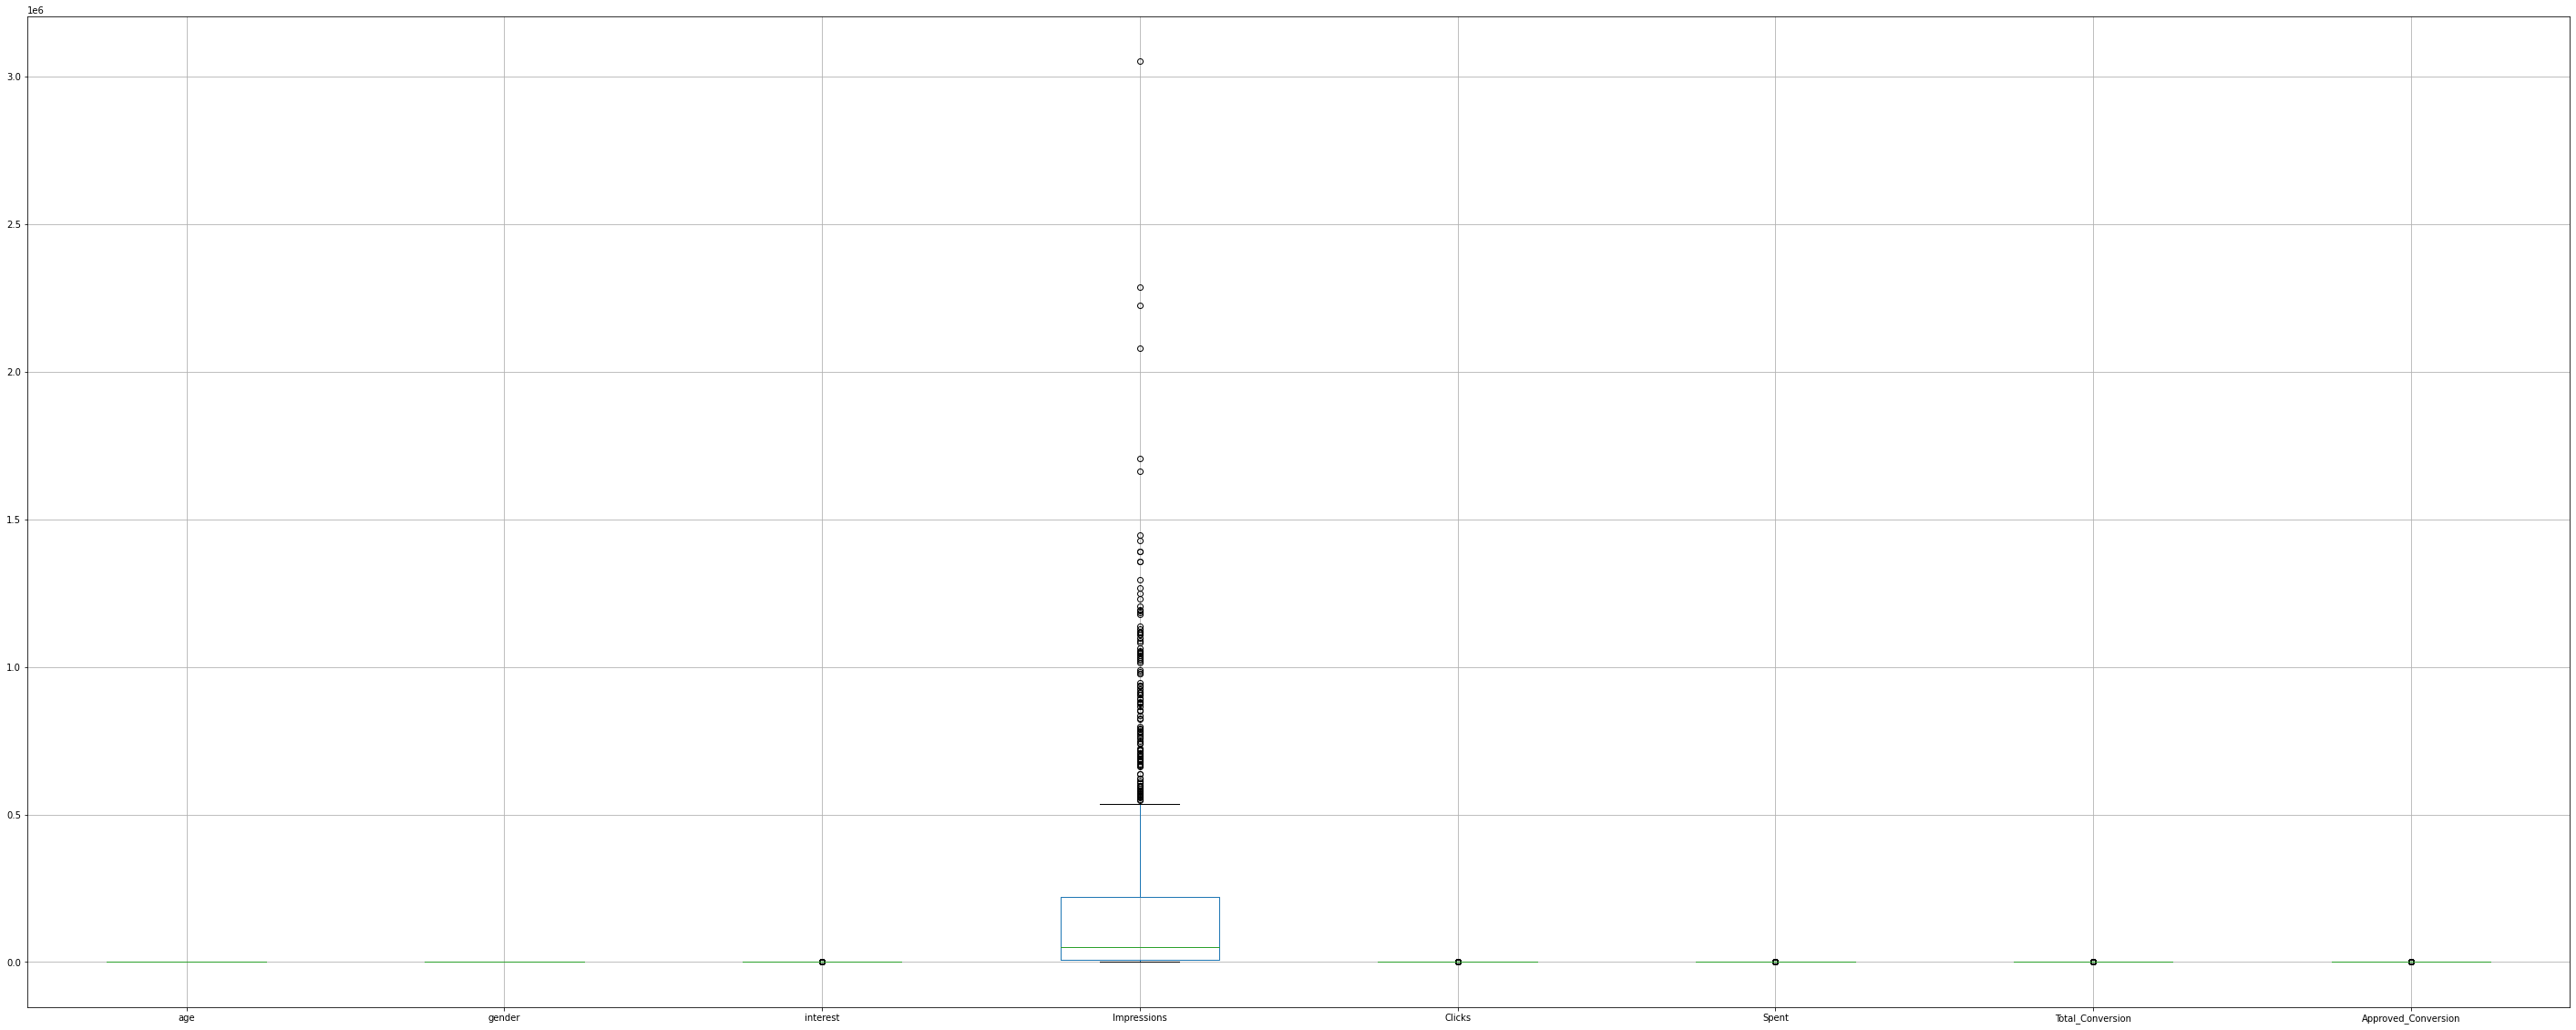

In [8]:
plt.figure(figsize=(50,20))
pd.DataFrame.boxplot(df.iloc[:,3:])
plt.show()

In [9]:
for i in df.iloc[:,3:]:
#     print(i)
    val = np.where(np.abs(stats.zscore(df[i])>3))
    print(f"{i} column has {len(val[0])} outliers")
    print(val[0])
    # return outliers row number under each column name

age column has 0 outliers
[]
gender column has 0 outliers
[]
interest column has 5 outliers
[1068 1090 1114 1128 1142]
Impressions column has 23 outliers
[ 518  524  525  528  574  628  662  706  760  765  768  807  860  865
  867  884  909  912  995 1026 1123 1127 1138]
Clicks column has 33 outliers
[ 525  574  662  706  760  765  807  860  865  867  884  903  909  929
  937  949  969  970  995 1002 1003 1009 1025 1026 1027 1032 1035 1041
 1118 1123 1127 1134 1138]
Spent column has 32 outliers
[ 525  528  574  662  706  760  765  768  807  812  860  865  867  884
  903  909  929  949  969  970  995 1002 1003 1025 1026 1027 1032 1041
 1118 1123 1134 1138]
Total_Conversion column has 26 outliers
[ 518  524  525  528  531  544  561  568  574  577  579  613  628  706
  806  807  827  859  860  867 1094 1097 1101 1115 1116 1127]
Approved_Conversion column has 22 outliers
[ 518  524  525  528  531  544  561  574  577  579  613  662  765  806
  807  860  867 1032 1101 1115 1116 1127]


In [10]:
def bound(column):#bound-max and min
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_range = q1- (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range,upper_range


def outlier_detection(target):#inject list dari boundnya
    sumlower=[]
    sumupper=[]
    lower=[0]*len(target)
    upper=[0]*len(target)
    for index , i in enumerate(target):
        lower[index],upper[index]=bound(i)
        sumlower.append(lower[index])
        sumupper.append(upper[index])
    return sumlower,sumupper


def outlier_remover(target):
    sumlower,sumupper=outlier_detection(target)
    ndf=df.copy()
    for index, i in enumerate(target):
        ndf[i]=ndf[i][(ndf[i]>sumlower[index])&(ndf[i]<sumupper[index])]   
    return ndf

In [11]:
target=['interest','Impressions','Clicks','Total_Conversion','Approved_Conversion']
df = outlier_remover(target)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,1,1,15.0,7350.0,1.0,1.43,2.0,1.0
1,708749,916,103917,1,1,16.0,17861.0,2.0,1.82,2.0,0.0
2,708771,916,103920,1,1,20.0,693.0,0.0,0.00,1.0,0.0
3,708815,916,103928,1,1,28.0,4259.0,1.0,1.25,1.0,0.0
4,708818,916,103928,1,1,28.0,4133.0,1.0,1.29,1.0,1.0


In [12]:
for i in df.iloc[:,3:]:
#     print(i)
    val = np.where(np.abs(stats.zscore(df[i])>3))
    print(f"{i} column has {len(val[0])} outliers")
    print(val[0])

age column has 0 outliers
[]
gender column has 0 outliers
[]
interest column has 0 outliers
[]
Impressions column has 0 outliers
[]
Clicks column has 0 outliers
[]
Spent column has 32 outliers
[ 525  528  574  662  706  760  765  768  807  812  860  865  867  884
  903  909  929  949  969  970  995 1002 1003 1025 1026 1027 1032 1041
 1118 1123 1134 1138]
Total_Conversion column has 0 outliers
[]
Approved_Conversion column has 0 outliers
[]


### After removing outliers, some columns will have missing values, we need to drop the columns 

In [13]:
# number of missing values for each column
df.isna().sum()

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
age                      0
gender                   0
interest               219
Impressions            123
Clicks                 127
Spent                    0
Total_Conversion       127
Approved_Conversion     95
dtype: int64

In [14]:
# drop missing values
df = df.dropna()
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

# Check the correlation between variables

In [15]:
df.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.942176,0.989092,0.061720,-0.118701,0.085602,0.601483,0.535920,0.547113,0.382822,0.146368
xyz_campaign_id,0.942176,1.000000,0.963549,0.075930,-0.142454,0.096268,0.652138,0.586111,0.596747,0.403345,0.149198
fb_campaign_id,0.989092,0.963549,1.000000,0.069259,-0.116866,0.088857,0.621235,0.556666,0.567365,0.388621,0.140045
age,0.061720,0.075930,0.069259,1.000000,0.033221,-0.042514,0.156826,0.278457,0.263740,-0.015494,-0.052434
gender,-0.118701,-0.142454,-0.116866,0.033221,1.000000,-0.017931,-0.091463,0.031312,-0.014504,-0.083825,-0.080276
interest,0.085602,0.096268,0.088857,-0.042514,-0.017931,1.000000,0.013619,0.022899,0.021766,-0.005272,-0.028897
Impressions,0.601483,0.652138,0.621235,0.156826,-0.091463,0.013619,1.000000,0.940952,0.962588,0.607613,0.233909
Clicks,0.535920,0.586111,0.556666,0.278457,0.031312,0.022899,0.940952,1.000000,0.991914,0.529010,0.178625
Spent,0.547113,0.596747,0.567365,0.263740,-0.014504,0.021766,0.962588,0.991914,1.000000,0.553461,0.191131
Total_Conversion,0.382822,0.403345,0.388621,-0.015494,-0.083825,-0.005272,0.607613,0.529010,0.553461,1.000000,0.397091


<AxesSubplot:>

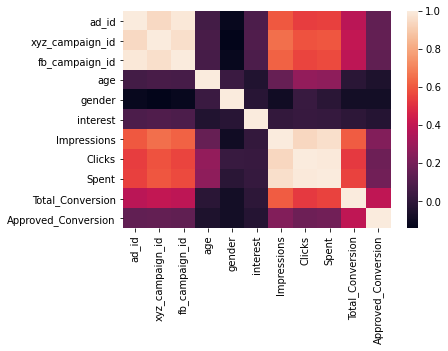

In [16]:
sns.heatmap(df.corr())

### Define Independent and Dependent variables:
- Independent: gender, age, spent
- Dependent: impression, click, total_conversion, approved_conversion

the more you spent on the ads, the more clicks it will generate


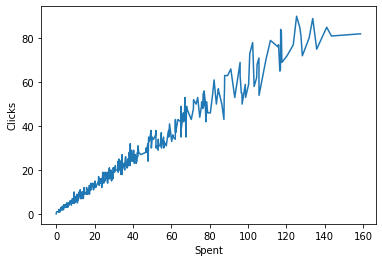

In [17]:
sns.lineplot(x="Spent", y = "Clicks",data = df)
print("the more you spent on the ads, the more clicks it will generate")

### Calculate Click through rate = Clicks/Impressions 

[0.022, 0.024, 0.017]


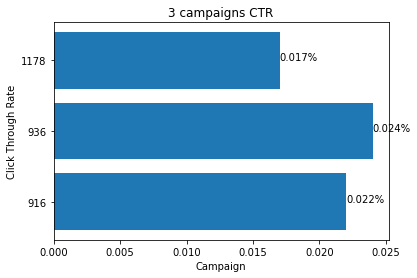

In [22]:
ads1 = df[df['xyz_campaign_id']==916]
ads2 = df[df['xyz_campaign_id']==936]
ads3 = df[df['xyz_campaign_id']==1178]
ctr_1 = round(((ads1['Clicks'].sum()/ads1['Impressions'].sum())*100),3)
ctr_2 = round(((ads2['Clicks'].sum()/ads2['Impressions'].sum())*100),3)
ctr_3 = round(((ads3['Clicks'].sum()/ads3['Impressions'].sum())*100),3)
ctr_total = [ctr_1, ctr_2, ctr_3]
x = ['916', '936', '1178']
print(ctr_total)
plt.xlabel('Campaign')
plt.ylabel("Click Through Rate")
plt.title("3 campaigns CTR")
plt.barh(x,ctr_total)
# display horizon bar chart with value label
for idx, val in enumerate(ctr_total):
    plt.text(val,idx,str(val)+"%")

#### Conclusion of CTR: 
Campaign 916 and 936 have higher CTR, indicating they either have a more effective message or better targeting than campaign 1178.

### Calculate Coversion rate = Approved_conversion / Clicks 
- Using approved_conversion: people who bought the product after seeing the ad.

[23.762, 9.845, 2.177]


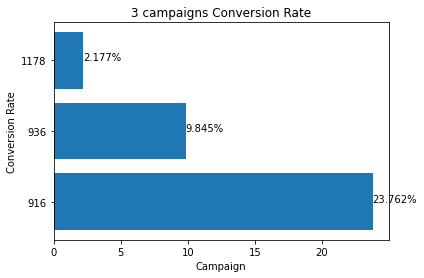

In [23]:
con_1 = round(((ads1['Approved_Conversion'].sum()/ads1['Clicks'].sum())*100),3)
con_2 = round(((ads2['Approved_Conversion'].sum()/ads2['Clicks'].sum())*100),3)
con_3 = round(((ads3['Approved_Conversion'].sum()/ads3['Clicks'].sum())*100),3)
con_total = [con_1, con_2, con_3]
x = ['916', '936', '1178']
print(con_total)
plt.xlabel('Campaign')
plt.ylabel("Conversion Rate")
plt.title("3 campaigns Conversion Rate")
plt.barh(x,con_total)
# display horizon bar chart with value label
for idx, val in enumerate(con_total):
    plt.text(val,idx,str(val)+"%")

#### Conclusion of Conversion Rate:
Campagin 916 and 936 have much larger conversion rates than campagin 1178. 

### Calculate Conversion Spent = Spent / Approved_conversion

[5.557, 14.655, 73.155]


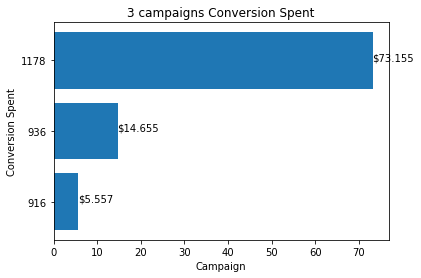

In [25]:
cc_1 = round(((ads1['Spent'].sum()/ads1['Approved_Conversion'].sum())),3)
cc_2 = round(((ads2['Spent'].sum()/ads2['Approved_Conversion'].sum())),3)
cc_3 = round(((ads3['Spent'].sum()/ads3['Approved_Conversion'].sum())),3)
cc_total = [cc_1, cc_2, cc_3]
x = ['916', '936', '1178']
print(cc_total)
plt.xlabel('Campaign')
plt.ylabel("Conversion Spent")
plt.title("3 campaigns Conversion Spent")
plt.barh(x,cc_total)
# display horizon bar chart with value label
for idx, val in enumerate(cc_total):
    plt.text(val,idx,"$"+str(val))

#### Conclusion for Conversion Spent: 
Campaign 1178 having more than 4 times the next highest campagin 936. This along with the CTR above helps build a story that Campaign 1178 messaging and targeting are off as they have both lower CTR (message not resonate as much with customers) and they have a higher Coversion Spent (targeted customers who do click the ad are not actually interested in purchasing the product). Another explanation could be the cost per click for Campagin 1178 higher than the other 2 campaigns which we will now examine. 

### Calculate the Cost per click = Spent / Clicks 

[1.32, 1.443, 1.593]


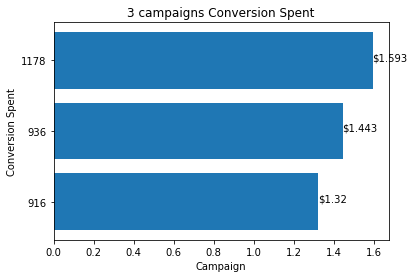

In [26]:
cpc_1 = round(((ads1['Spent'].sum()/ads1['Clicks'].sum())),3)
cpc_2 = round(((ads2['Spent'].sum()/ads2['Clicks'].sum())),3)
cpc_3 = round(((ads3['Spent'].sum()/ads3['Clicks'].sum())),3)
cpc_total = [cpc_1, cpc_2, cpc_3]
x = ['916', '936', '1178']
print(cpc_total)
plt.xlabel('Campaign')
plt.ylabel("Conversion Spent")
plt.title("3 campaigns Conversion Spent")
plt.barh(x,cpc_total)
# display horizon bar chart with value label
for idx, val in enumerate(cpc_total):
    plt.text(val,idx,"$"+str(val))

#### Conclusion on CPC:
CPC for campagin 1178 is the highest, but the difference does not make up for the much larger Conversion spent previous shown. 